In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [19]:
number_events = 100000
y_pred_noise = np.random.normal(-1, 1, number_events)
y_pred_signal = np.random.normal(1, 1, number_events)
y_pred = np.concatenate((y_pred_noise, y_pred_signal))
y_signal = np.ones(number_events)
y_noise = np.zeros(number_events)
y = np.concatenate((y_noise, y_signal))

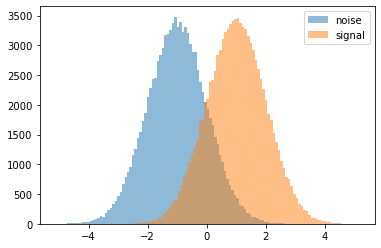

In [3]:
_ = plt.hist(y_pred[y == 0], bins=100, alpha=0.5, label='noise')
_ = plt.hist(y_pred[y == 1], bins=100, alpha=0.5, label='signal')
plt.legend()

In [5]:
# Define your function
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [6]:
number_events = 100000
cut = 0.0001
y_pred_noise = np.random.normal(-2, 1, number_events)
y_pred_signal = np.random.normal(2, 1, number_events)
y_pred = np.concatenate((y_pred_noise, y_pred_signal))
y_signal = np.ones(number_events)
y_noise = np.zeros(number_events)
y = np.concatenate((y_noise, y_signal))
noise = y_pred[y == 0]
y_pred_noise = np.sort(noise)
ratio = 1 - np.linspace(0.00000001, 1, len(noise))
mask = (ratio < cut*100)
ratio_filtered = ratio[mask]

y_pred_sorted_noise = y_pred_noise[mask]
plt.scatter(y_pred_sorted_noise, ratio_filtered, label='noise')
plt.yscale('log')
p = np.poly1d(np.polyfit(y_pred_sorted_noise, ratio_filtered, int(len(ratio_filtered)/3) +1 ))
popt, pcov = curve_fit(func, y_pred_sorted_noise, ratio_filtered)



x_fit = np.linspace(np.min(y_pred_sorted_noise), np.max(y_pred_sorted_noise), 10000)
y_poly_fit_2 = p(x_fit)
y_func_fit = func(x_fit, *popt)
threshold = np.amin(y_pred_sorted_noise[ratio_filtered < cut])
fit_func_threshold = np.amin(x_fit[y_func_fit < cut])
fit_poly_threshold = np.amin(x_fit[y_poly_fit_2 < cut])


plt.plot(x_fit, y_poly_fit_2, label='poly fit 2')
plt.plot(x_fit, y_func_fit, label='fit')
plt.axvline(fit_func_threshold, color='red', label='func fit threshold')
plt.axvline(threshold, color='green', label='threshold')
plt.axvline(fit_poly_threshold, color='purple', label='poly fit threshold')
plt.grid()
plt.legend()

pred_signal = y_pred[y == 1] > threshold
efficiency = np.sum(pred_signal / np.sum(y == 1))
print('Efficiency:', efficiency)

pred_signal = y_pred[y == 1] > fit_func_threshold
efficiency = np.sum(pred_signal / np.sum(y == 1))
print('Efficiency fit:', efficiency)

pred_signal = y_pred[y == 1] > fit_poly_threshold
efficiency = np.sum(pred_signal / np.sum(y == 1))
print('Efficiency poly fit:', efficiency)




/tmp/ipykernel_720979/3160045278.py:11: RuntimeWarning: divide by zero encountered in log
  ratio = np.log(1 - np.linspace(0.00000001, 1, len(noise)))


/tmp/ipykernel_720979/3160045278.py:17: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')
/home/halin/.local/lib/python3.8/site-packages/numpy/lib/twodim_base.py:626: RuntimeWarning: overflow encountered in accumulate
  multiply.accumulate(tmp[:, 1:], out=tmp[:, 1:], axis=1)
/home/halin/.local/lib/python3.8/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/halin/.local/lib/python3.8/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale
